# Data Understanding

In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv('data.csv')

In [4]:
data.head()

,age,gender,security_no,region_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,...,past_complaint,complaint_status,feedback,churn,plan_tier,logins_90d,active_days_90d,api_calls_90d,session_minutes_90d,days_since_active
0,18,F,XW0DQ7H,Village,17-08-2017,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,...,No,Not Applicable,Products always in Stock,0,Enterprise,46,33,8793,1027.11,2
1,32,F,5K0N3X1,City,28-08-2017,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,...,Yes,Solved,Quality Customer Care,0,Enterprise,37,30,8605,862.65,1
2,44,F,1F2TCL3,Town,11-11-2016,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,...,Yes,Solved in Follow-up,Poor Website,1,Basic,17,17,267,411.37,16
3,37,M,VJGJ33N,City,29-10-2016,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,...,Yes,Unsolved,Poor Website,1,Basic,8,8,227,215.77,20
4,31,F,SVZXCWB,City,12-09-2017,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,...,Yes,Solved,Poor Website,1,Basic,13,11,294,231.94,2


In [5]:
data.shape

(36992, 28)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36992 non-null  object 
 2   security_no                   36992 non-null  object 
 3   region_category               31564 non-null  object 
 4   joining_date                  36992 non-null  object 
 5   joined_through_referral       36992 non-null  object 
 6   referral_id                   36992 non-null  object 
 7   preferred_offer_types         36704 non-null  object 
 8   medium_of_operation           36992 non-null  object 
 9   internet_option               36992 non-null  object 
 10  last_visit_time               36992 non-null  object 
 11  days_since_last_login         36992 non-null  int64  
 12  avg_session_duration          36992 non-null  float64
 13  a

In [7]:
data.isnull().sum()

age                                0
gender                             0
security_no                        0
region_category                 5428
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_session_duration               0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn                              0
plan_tier                          0
logins_90d                         0
active_days_90d                    0
api_calls_90d                      0
session_minutes_90d                0
d

In [8]:
data['churn'].value_counts()/data.shape[0]

churn
1    0.540982
0    0.459018
Name: count, dtype: float64

#### This shows that the data is not imbalanced

In [9]:
data.dtypes

age                               int64
gender                           object
security_no                      object
region_category                  object
joining_date                     object
joined_through_referral          object
referral_id                      object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_session_duration            float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn                             int64
plan_tier                        object
logins_90d                        int64
active_days_90d                   int64


In [10]:
df=data.copy()

In [11]:
def unique_values(df):
    for c in df.columns:
        if df[c].dtypes=='object':
            print(f'{c} --> {df[c].unique()}')

In [12]:
unique_values(df)

gender --> ['F' 'M' 'Unknown']
security_no --> ['XW0DQ7H' '5K0N3X1' '1F2TCL3' ... 'XK1IM9H' 'K6VTP1Z' 'LBX0GLR']
region_category --> ['Village' 'City' 'Town' nan]
joining_date --> ['17-08-2017' '28-08-2017' '11-11-2016' ... '11-12-2017' '25-09-2016'
 '15-04-2017']
joined_through_referral --> ['No' '?' 'Yes']
referral_id --> ['xxxxxxxx' 'CID21329' 'CID12313' ... 'CID60808' 'CID10431' 'CID45477']
preferred_offer_types --> ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan]
medium_of_operation --> ['?' 'Desktop' 'Smartphone' 'Both']
internet_option --> ['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']
last_visit_time --> ['16:08:02' '12:38:13' '22:53:21' ... '4:14:05' '9:50:03' '1:39:52']
avg_frequency_login_days --> ['17' '10' '22' ... '-9.325511142' '-8.759329713' '27.83992744']
used_special_discount --> ['Yes' 'No']
offer_application_preference --> ['Yes' 'No']
past_complaint --> ['No' 'Yes']
complaint_status --> ['Not Applicable' 'Solved' 'Solved in Follow-up' 'Unsolved'
 'N

# Data Preprocessing/Cleaning

In [13]:
empty_string_columns=['gender','joined_through_network','medium_of_operation']

In [14]:
df['gender']=df['gender'].replace('Unknown',df['gender'].mode()[0])
df['joined_through_referral']=df['joined_through_referral'].replace('?',df['joined_through_referral'].mode()[0])
df['medium_of_operation']=df['medium_of_operation'].replace('?',df['medium_of_operation'].mode()[0])

In [15]:
unique_values(df)

gender --> ['F' 'M']
security_no --> ['XW0DQ7H' '5K0N3X1' '1F2TCL3' ... 'XK1IM9H' 'K6VTP1Z' 'LBX0GLR']
region_category --> ['Village' 'City' 'Town' nan]
joining_date --> ['17-08-2017' '28-08-2017' '11-11-2016' ... '11-12-2017' '25-09-2016'
 '15-04-2017']
joined_through_referral --> ['No' 'Yes']
referral_id --> ['xxxxxxxx' 'CID21329' 'CID12313' ... 'CID60808' 'CID10431' 'CID45477']
preferred_offer_types --> ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan]
medium_of_operation --> ['Desktop' 'Smartphone' 'Both']
internet_option --> ['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']
last_visit_time --> ['16:08:02' '12:38:13' '22:53:21' ... '4:14:05' '9:50:03' '1:39:52']
avg_frequency_login_days --> ['17' '10' '22' ... '-9.325511142' '-8.759329713' '27.83992744']
used_special_discount --> ['Yes' 'No']
offer_application_preference --> ['Yes' 'No']
past_complaint --> ['No' 'Yes']
complaint_status --> ['Not Applicable' 'Solved' 'Solved in Follow-up' 'Unsolved'
 'No Information Avai

In [16]:
yes_no_m_f_columns=['gender','joined_through_referral','used_special_discount','offer_application_preference','past_complaint']

In [17]:
from sklearn.preprocessing import LabelEncoder
var={}
for c in yes_no_m_f_columns:
    le=LabelEncoder()
    df[c]=le.fit_transform(df[c])
    var[c]=le

In [18]:
df.head(3)

,age,gender,security_no,region_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,...,past_complaint,complaint_status,feedback,churn,plan_tier,logins_90d,active_days_90d,api_calls_90d,session_minutes_90d,days_since_active
0,18,0,XW0DQ7H,Village,17-08-2017,0,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Wi-Fi,...,0,Not Applicable,Products always in Stock,0,Enterprise,46,33,8793,1027.11,2
1,32,0,5K0N3X1,City,28-08-2017,0,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,...,1,Solved,Quality Customer Care,0,Enterprise,37,30,8605,862.65,1
2,44,0,1F2TCL3,Town,11-11-2016,1,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,...,1,Solved in Follow-up,Poor Website,1,Basic,17,17,267,411.37,16


In [19]:
unique_values(df)

security_no --> ['XW0DQ7H' '5K0N3X1' '1F2TCL3' ... 'XK1IM9H' 'K6VTP1Z' 'LBX0GLR']
region_category --> ['Village' 'City' 'Town' nan]
joining_date --> ['17-08-2017' '28-08-2017' '11-11-2016' ... '11-12-2017' '25-09-2016'
 '15-04-2017']
referral_id --> ['xxxxxxxx' 'CID21329' 'CID12313' ... 'CID60808' 'CID10431' 'CID45477']
preferred_offer_types --> ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan]
medium_of_operation --> ['Desktop' 'Smartphone' 'Both']
internet_option --> ['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']
last_visit_time --> ['16:08:02' '12:38:13' '22:53:21' ... '4:14:05' '9:50:03' '1:39:52']
avg_frequency_login_days --> ['17' '10' '22' ... '-9.325511142' '-8.759329713' '27.83992744']
complaint_status --> ['Not Applicable' 'Solved' 'Solved in Follow-up' 'Unsolved'
 'No Information Available']
feedback --> ['Products always in Stock' 'Quality Customer Care' 'Poor Website'
 'No reason specified' 'Poor Product Quality' 'Poor Customer Service'
 'Too many ads' 'User

In [20]:
fill_na=['region_category','preferred_offer_types']
for c in fill_na:
    df[c]=df[c].fillna(df[c].mode()[0])

<Axes: xlabel='points_in_wallet', ylabel='Density'>

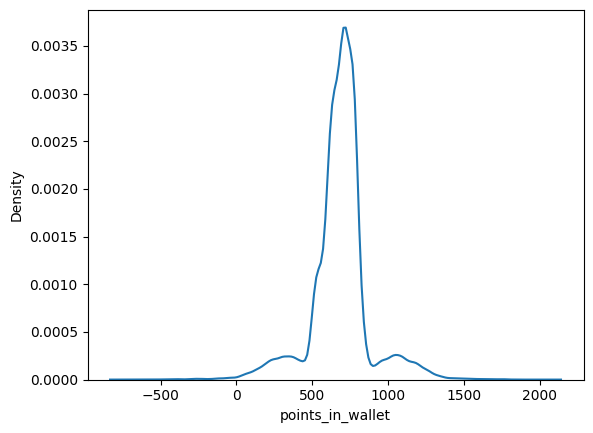

In [21]:
import seaborn as sns
sns.kdeplot(df['points_in_wallet'])

In [22]:
df['points_in_wallet'].skew()

-0.0803091829746022

In [23]:
df['points_in_wallet']=df['points_in_wallet'].fillna(df['points_in_wallet'].mean())

In [24]:
df['avg_frequency_login_days']=pd.to_numeric(df['avg_frequency_login_days'],errors='coerce')

<Axes: xlabel='avg_frequency_login_days', ylabel='Density'>

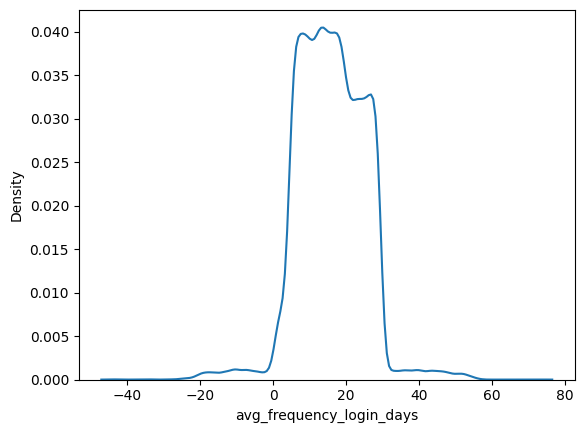

In [25]:
sns.kdeplot(df['avg_frequency_login_days'])

In [26]:
df['avg_frequency_login_days'].skew()

0.005767066591342272

In [27]:
df['avg_frequency_login_days']=df['avg_frequency_login_days'].fillna(df['avg_frequency_login_days'].mean())

In [28]:
to_onehot_encode=['region_category','preferred_offer_types','medium_of_operation','internet_option','complaint_status','plan_tier','feedback']

In [29]:
df1_ohe=pd.get_dummies(data=df,columns=['region_category','preferred_offer_types','medium_of_operation','internet_option','complaint_status','plan_tier','feedback'])
df1_ohe.columns

Index(['age', 'gender', 'security_no', 'joining_date',
       'joined_through_referral', 'referral_id', 'last_visit_time',
       'days_since_last_login', 'avg_session_duration',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'churn', 'logins_90d', 'active_days_90d',
       'api_calls_90d', 'session_minutes_90d', 'days_since_active',
       'region_category_City', 'region_category_Town',
       'region_category_Village',
       'preferred_offer_types_Credit/Debit Card Offers',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'medium_of_operation_Both',
       'medium_of_operation_Desktop', 'medium_of_operation_Smartphone',
       'internet_option_Fiber_Optic', 'internet_option_Mobile_Data',
       'internet_option_Wi-Fi', 'complaint_status_No Information Available',
       'complaint_status_Not Applicable', 'compla

In [30]:
df1_ohe.sample(4)

,age,gender,security_no,joining_date,joined_through_referral,referral_id,last_visit_time,days_since_last_login,avg_session_duration,avg_transaction_value,...,plan_tier_Pro,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
7225,53,0,15V5ZSD,21-11-2017,0,CID19042,5:00:27,9,1093.73,47956.62,...,True,False,False,False,False,False,False,False,False,True
35240,38,1,F45EXYN,26-11-2016,0,CID60306,7:18:56,15,65.09,17444.71,...,False,True,False,False,False,False,False,False,False,False
12267,54,0,4MW2PY5,11-09-2017,1,CID50747,13:31:40,12,121.71,34933.67,...,False,False,False,False,False,False,False,False,True,False
15732,45,1,KS3XVU6,25-10-2015,0,xxxxxxxx,1:55:08,9,141.36,24639.27,...,False,True,False,False,False,False,False,False,False,False


In [31]:
for c in df1_ohe.columns:
    df1_ohe[c]=df1_ohe[c].replace({True:1,False:0})

/var/folders/nc/hvlqvddd2xj11jl0l69nx3580000gn/T/ipykernel_34955/3315045924.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1_ohe[c]=df1_ohe[c].replace({True:1,False:0})


In [32]:
df1_ohe.sample(3)

,age,gender,security_no,joining_date,joined_through_referral,referral_id,last_visit_time,days_since_last_login,avg_session_duration,avg_transaction_value,...,plan_tier_Pro,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
21031,56,0,J5PXV08,27-04-2016,0,xxxxxxxx,0:01:00,17,30.34,42404.09,...,1,0,0,0,0,0,0,0,1,0
6167,52,0,T3MJY65,30-09-2016,0,CID36891,10:49:39,10,36.10,24456.45,...,0,0,0,0,0,0,0,0,1,0
34693,20,0,YYGA0PJ,18-11-2017,0,xxxxxxxx,3:07:51,14,31.23,43167.00,...,0,0,1,0,0,0,0,0,0,0


In [33]:
df2=df1_ohe.select_dtypes(include=['int64','float64'])
abs(df2.corr()['churn']).sort_values(ascending=False)

churn                                             1.000000
plan_tier_Basic                                   0.726132
api_calls_90d                                     0.659219
active_days_90d                                   0.647458
logins_90d                                        0.643144
plan_tier_Enterprise                              0.606217
session_minutes_90d                               0.524295
points_in_wallet                                  0.292793
days_since_active                                 0.273094
avg_transaction_value                             0.218012
feedback_Reasonable Price                         0.216665
feedback_User Friendly Website                    0.214590
feedback_Products always in Stock                 0.213867
feedback_Quality Customer Care                    0.212093
plan_tier_Pro                                     0.210168
avg_frequency_login_days                          0.125611
feedback_Poor Product Quality                     0.0995

In [34]:
df3_le=df.copy()
var2={}
for c in to_onehot_encode:
    le=LabelEncoder()
    df3_le[c]=le.fit_transform(df[c])
    var2[c]=le

In [35]:
df3_1=df3_le.select_dtypes(include=['int64','float64'])
abs(df3_1.corr()['churn']).sort_values(ascending=False)

churn                           1.000000
api_calls_90d                   0.659219
active_days_90d                 0.647458
logins_90d                      0.643144
plan_tier                       0.526254
session_minutes_90d             0.524295
points_in_wallet                0.292793
days_since_active               0.273094
avg_transaction_value           0.218012
feedback                        0.207723
avg_frequency_login_days        0.125611
joined_through_referral         0.028695
preferred_offer_types           0.025032
medium_of_operation             0.020011
offer_application_preference    0.018729
region_category                 0.017875
avg_session_duration            0.014263
used_special_discount           0.010648
past_complaint                  0.008934
internet_option                 0.007493
days_since_last_login           0.006228
age                             0.006124
gender                          0.004701
complaint_status                0.000114
Name: churn, dty

In [36]:
df3_le.sample(4)

,age,gender,security_no,region_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,...,past_complaint,complaint_status,feedback,churn,plan_tier,logins_90d,active_days_90d,api_calls_90d,session_minutes_90d,days_since_active
20159,27,1,ZJEOCNO,0,10-08-2016,0,CID57876,0,1,0,...,1,3,3,1,0,16,15,197,466.78,0
17295,52,0,HRYORLX,1,23-12-2016,0,xxxxxxxx,0,1,0,...,1,3,2,1,2,18,17,2223,339.22,0
292,21,1,YEQQD8L,1,20-09-2015,0,xxxxxxxx,0,2,1,...,0,1,7,0,1,52,43,8268,1356.33,2
14910,50,1,YFO0DTD,1,05-10-2016,0,xxxxxxxx,0,1,0,...,1,3,1,1,2,25,23,2251,582.34,0


In [37]:
df.select_dtypes(include=['int64','float64']).describe()

,age,gender,joined_through_referral,days_since_last_login,avg_session_duration,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,churn,logins_90d,active_days_90d,api_calls_90d,session_minutes_90d,days_since_active
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,0.498567,0.424822,-41.915576,243.472334,29271.194003,15.976715,686.882199,0.549903,0.552552,0.497135,0.540982,24.013057,20.428795,3223.677849,524.694113,4.312203
std,15.867412,0.500005,0.494323,228.819900,398.289149,19444.806226,8.766154,184.811682,0.497510,0.497237,0.499999,0.498324,12.778238,9.473876,4060.336858,345.090190,5.781831
min,10.000000,0.000000,0.000000,-999.000000,-2814.109110,800.460000,-43.652702,-760.661236,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,171.000000,5.400000,0.000000
25%,23.000000,0.000000,0.000000,8.000000,60.102500,14177.540000,10.000000,624.350000,0.000000,0.000000,0.000000,0.000000,14.000000,13.000000,346.000000,266.135000,1.000000
50%,37.000000,0.000000,0.000000,12.000000,161.765000,27554.485000,15.976715,686.882199,1.000000,1.000000,0.000000,1.000000,21.000000,19.000000,1626.000000,432.570000,2.000000
75%,51.000000,1.000000,1.000000,16.000000,356.515000,40855.110000,22.000000,757.002500,1.000000,1.000000,1.000000,1.000000,32.000000,27.000000,2967.000000,707.270000,6.000000
max,64.000000,1.000000,1.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000,1.000000,1.000000,1.000000,75.000000,54.000000,18776.000000,2192.280000,78.000000


In [38]:
to_scale=['age','days_since_last_login','avg_session_duration','avg_transaction_value','avg_frequency_login_days','points_in_wallet','logins_90d','active_days_90d','api_calls_90d','session_minutes_90d','days_since_active']

In [39]:
df[to_scale].dtypes

age                           int64
days_since_last_login         int64
avg_session_duration        float64
avg_transaction_value       float64
avg_frequency_login_days    float64
points_in_wallet            float64
logins_90d                    int64
active_days_90d               int64
api_calls_90d                 int64
session_minutes_90d         float64
days_since_active             int64
dtype: object

In [40]:
from sklearn.preprocessing import StandardScaler
def std_scaler(df,to_scale):
    std=StandardScaler()
    df[to_scale]=std.fit_transform(df[to_scale])

In [41]:
std_scaler(df,to_scale)

In [42]:
from sklearn.preprocessing import MinMaxScaler
def norm_scaler(df,to_scale):
    min_max_scaler=MinMaxScaler()
    df[to_scale]=min_max_scaler.fit_transform(df[to_scale])

In [43]:
norm_scaler(df1_ohe,to_scale)

In [44]:
df1_ohe.head(5)

,age,gender,security_no,joining_date,joined_through_referral,referral_id,last_visit_time,days_since_last_login,avg_session_duration,avg_transaction_value,...,plan_tier_Pro,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,0.148148,0,XW0DQ7H,17-08-2017,0,xxxxxxxx,16:08:02,0.991220,0.514859,0.526717,...,0,0,0,0,0,1,0,0,0,0
1,0.407407,0,5K0N3X1,28-08-2017,0,CID21329,12:38:13,0.990244,0.515803,0.121456,...,0,0,0,0,0,0,1,0,0,0
2,0.629630,0,1F2TCL3,11-11-2016,1,CID12313,22:53:21,0.988293,0.550486,0.204074,...,0,0,0,0,1,0,0,0,0,0
3,0.500000,1,VJGJ33N,29-10-2016,1,CID3793,15:57:50,0.985366,0.473971,0.246577,...,0,0,0,0,1,0,0,0,0,0
4,0.388889,0,SVZXCWB,12-09-2017,0,xxxxxxxx,15:46:44,0.994146,0.483866,0.238950,...,0,0,0,0,1,0,0,0,0,0


In [45]:
df1_ohe.dtypes

age                                               float64
gender                                              int64
security_no                                        object
joining_date                                       object
joined_through_referral                             int64
referral_id                                        object
last_visit_time                                    object
days_since_last_login                             float64
avg_session_duration                              float64
avg_transaction_value                             float64
avg_frequency_login_days                          float64
points_in_wallet                                  float64
used_special_discount                               int64
offer_application_preference                        int64
past_complaint                                      int64
churn                                               int64
logins_90d                                        float64
active_days_90

In [46]:
norm_scaler(df3_le,to_scale)

In [47]:
df3_le.head()

,age,gender,security_no,region_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,...,past_complaint,complaint_status,feedback,churn,plan_tier,logins_90d,active_days_90d,api_calls_90d,session_minutes_90d,days_since_active
0,0.148148,0,XW0DQ7H,2,17-08-2017,0,xxxxxxxx,1,1,2,...,0,1,4,0,1,0.608108,0.603774,0.463424,0.467200,0.025641
1,0.407407,0,5K0N3X1,0,28-08-2017,0,CID21329,1,1,1,...,1,2,5,0,1,0.486486,0.547170,0.453319,0.391997,0.012821
2,0.629630,0,1F2TCL3,1,11-11-2016,1,CID12313,1,1,2,...,1,3,3,1,0,0.216216,0.301887,0.005160,0.185639,0.205128
3,0.500000,1,VJGJ33N,0,29-10-2016,1,CID3793,1,1,1,...,1,4,3,1,0,0.094595,0.132075,0.003010,0.096196,0.256410
4,0.388889,0,SVZXCWB,0,12-09-2017,0,xxxxxxxx,0,2,1,...,1,2,3,1,0,0.162162,0.188679,0.006611,0.103591,0.025641


In [48]:
df3_le.dtypes

age                             float64
gender                            int64
security_no                      object
region_category                   int64
joining_date                     object
joined_through_referral           int64
referral_id                      object
preferred_offer_types             int64
medium_of_operation               int64
internet_option                   int64
last_visit_time                  object
days_since_last_login           float64
avg_session_duration            float64
avg_transaction_value           float64
avg_frequency_login_days        float64
points_in_wallet                float64
used_special_discount             int64
offer_application_preference      int64
past_complaint                    int64
complaint_status                  int64
feedback                          int64
churn                             int64
plan_tier                         int64
logins_90d                      float64
active_days_90d                 float64


In [49]:
input_data1=df1_ohe.copy()
input_data2=df3_le.copy()

In [50]:
input_data1=input_data1.drop(columns=['security_no','joining_date','referral_id','last_visit_time'])
input_data2=input_data2.drop(columns=['security_no','joining_date','referral_id','last_visit_time'])

In [51]:
input_data2.columns

Index(['age', 'gender', 'region_category', 'joined_through_referral',
       'preferred_offer_types', 'medium_of_operation', 'internet_option',
       'days_since_last_login', 'avg_session_duration',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'complaint_status', 'feedback', 'churn', 'plan_tier',
       'logins_90d', 'active_days_90d', 'api_calls_90d', 'session_minutes_90d',
       'days_since_active'],
      dtype='object')

In [52]:
input_data1.shape,input_data2.shape

((36992, 46), (36992, 24))

# Model Building

In [53]:
x=input_data1.drop(columns=['churn'])
y=input_data1['churn']

x2=input_data2.drop(columns=['churn'])
y2=input_data2['churn']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,test_size=0.2,random_state=42)

In [54]:
import tensorflow
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

In [55]:
early_stop=EarlyStopping(monitor='val_accuracy',patience=6,restore_best_weights=True)
reduce_lr=ReduceLROnPlateau(monitor='val_accuracy',patience=3,factor=0.2)

In [56]:
ANN_Model=Sequential([
    Dense(30,input_dim=45,activation='relu'),
    Dense(1,activation='sigmoid')
])

ANN_Model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
ANN_train=ANN_Model.fit(x_train,y_train,epochs=100,validation_split=0.2,callbacks=[early_stop,reduce_lr])

Epoch 1/100


2025-10-25 17:07:15.716544: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-10-25 17:07:15.716562: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-10-25 17:07:15.716566: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-10-25 17:07:15.716605: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-10-25 17:07:15.716634: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-10-25 17:07:15.992352: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


740/740 [==============================] - 4s 4ms/step - loss: 0.3265 - accuracy: 0.8308 - val_loss: 0.2617 - val_accuracy: 0.8456 - lr: 0.0010
Epoch 2/100
740/740 [==============================] - 3s 4ms/step - loss: 0.2625 - accuracy: 0.8485 - val_loss: 0.2545 - val_accuracy: 0.8503 - lr: 0.0010
Epoch 3/100
740/740 [==============================] - 3s 4ms/step - loss: 0.2599 - accuracy: 0.8490 - val_loss: 0.2528 - val_accuracy: 0.8549 - lr: 0.0010
Epoch 4/100
740/740 [==============================] - 3s 4ms/step - loss: 0.2577 - accuracy: 0.8518 - val_loss: 0.2527 - val_accuracy: 0.8486 - lr: 0.0010
Epoch 5/100
740/740 [==============================] - 3s 4ms/step - loss: 0.2573 - accuracy: 0.8540 - val_loss: 0.2522 - val_accuracy: 0.8528 - lr: 0.0010
Epoch 6/100
740/740 [==============================] - 3s 4ms/step - loss: 0.2560 - accuracy: 0.8562 - val_loss: 0.2503 - val_accuracy: 0.8611 - lr: 0.0010
Epoch 7/100
740/740 [==============================] - 3s 4ms/step - loss: 0

In [57]:
ANN_Model2=Sequential([
    Dense(30,input_dim=23,activation='tanh'),
    Dense(15,activation='tanh'),
    Dense(1,activation='sigmoid')
])

ANN_Model2.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
ANN_train2=ANN_Model2.fit(x_train2,y_train2,epochs=100,validation_split=0.3,callbacks=[early_stop,reduce_lr])

Epoch 1/100
648/648 [==============================] - 4s 6ms/step - loss: 0.3894 - accuracy: 0.8230 - val_loss: 0.2959 - val_accuracy: 0.8481 - lr: 0.0010
Epoch 2/100
648/648 [==============================] - 4s 5ms/step - loss: 0.2972 - accuracy: 0.8467 - val_loss: 0.2894 - val_accuracy: 0.8546 - lr: 0.0010
Epoch 3/100
648/648 [==============================] - 3s 5ms/step - loss: 0.2890 - accuracy: 0.8466 - val_loss: 0.2754 - val_accuracy: 0.8522 - lr: 0.0010
Epoch 4/100
648/648 [==============================] - 3s 5ms/step - loss: 0.2852 - accuracy: 0.8493 - val_loss: 0.2723 - val_accuracy: 0.8528 - lr: 0.0010
Epoch 5/100
648/648 [==============================] - 3s 5ms/step - loss: 0.2829 - accuracy: 0.8493 - val_loss: 0.2728 - val_accuracy: 0.8504 - lr: 0.0010
Epoch 6/100
648/648 [==============================] - 3s 5ms/step - loss: 0.2792 - accuracy: 0.8516 - val_loss: 0.2713 - val_accuracy: 0.8503 - lr: 2.0000e-04
Epoch 7/100
648/648 [==============================] - 3s 5m

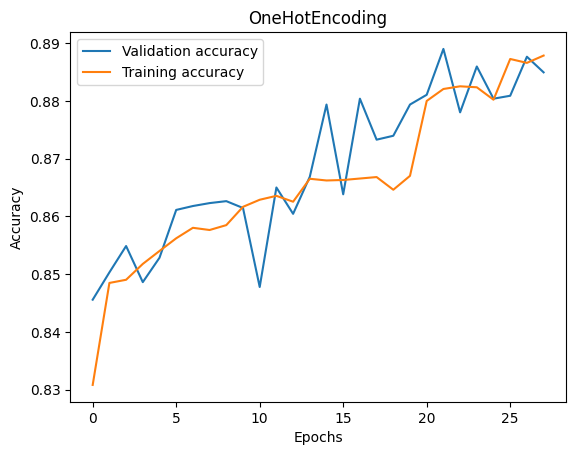

In [58]:
import matplotlib.pyplot as plt
plt.plot(ANN_train.history['val_accuracy'],label='Validation accuracy')
plt.plot(ANN_train.history['accuracy'],label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('OneHotEncoding')
plt.legend()

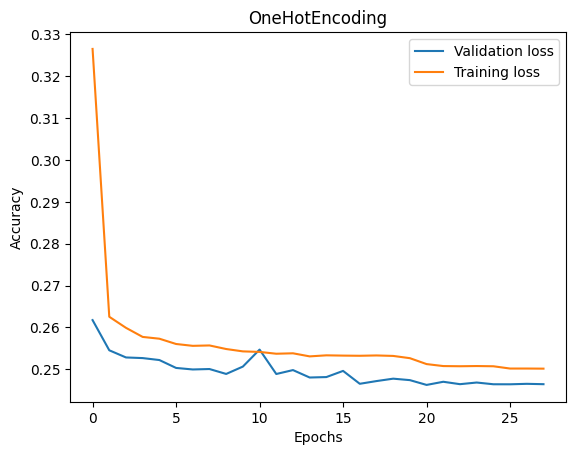

In [59]:
plt.plot(ANN_train.history['val_loss'],label='Validation loss')
plt.plot(ANN_train.history['loss'],label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('OneHotEncoding')
plt.legend()

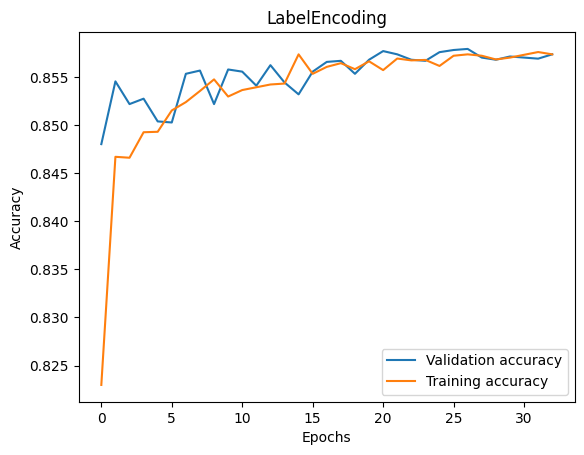

In [60]:
plt.plot(ANN_train2.history['val_accuracy'],label='Validation accuracy')
plt.plot(ANN_train2.history['accuracy'],label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LabelEncoding')
plt.legend()

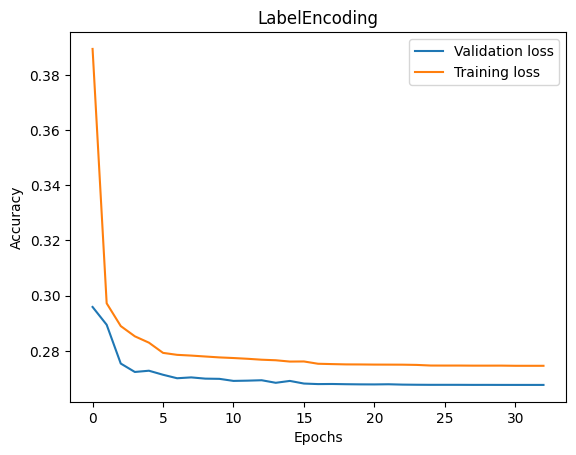

In [61]:
plt.plot(ANN_train2.history['val_loss'],label='Validation loss')
plt.plot(ANN_train2.history['loss'],label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LabelEncoding')
plt.legend()

In [62]:
y_pred=(ANN_Model.predict(x_test)>=0.5).astype(np.int64)
y_pred2=(ANN_Model2.predict(x_test2)>=0.5).astype(np.int64)

232/232 [==============================] - 0s 1ms/step


In [63]:
from sklearn.metrics import accuracy_score
print("Accuracy on test ohe ",accuracy_score(y_test,y_pred))
print("Accuracy on test le ",accuracy_score(y_test2,y_pred2))

Accuracy on test ohe  0.8832274631706988
Accuracy on test le  0.8547100959589133


In [64]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification Report for the ANN OneHotEncoding")
print(classification_report(y_test,y_pred))

Classification Report for the ANN OneHotEncoding
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      3377
           1       0.87      0.92      0.90      4022

    accuracy                           0.88      7399
   macro avg       0.88      0.88      0.88      7399
weighted avg       0.88      0.88      0.88      7399



In [65]:
print("Classification Report for the ANN LabelEncoding")
print(classification_report(y_test2,y_pred2))

Classification Report for the ANN LabelEncoding
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      3377
           1       0.88      0.84      0.86      4022

    accuracy                           0.85      7399
   macro avg       0.85      0.86      0.85      7399
weighted avg       0.86      0.85      0.85      7399



Text(95.72222222222221, 0.5, 'Truth')

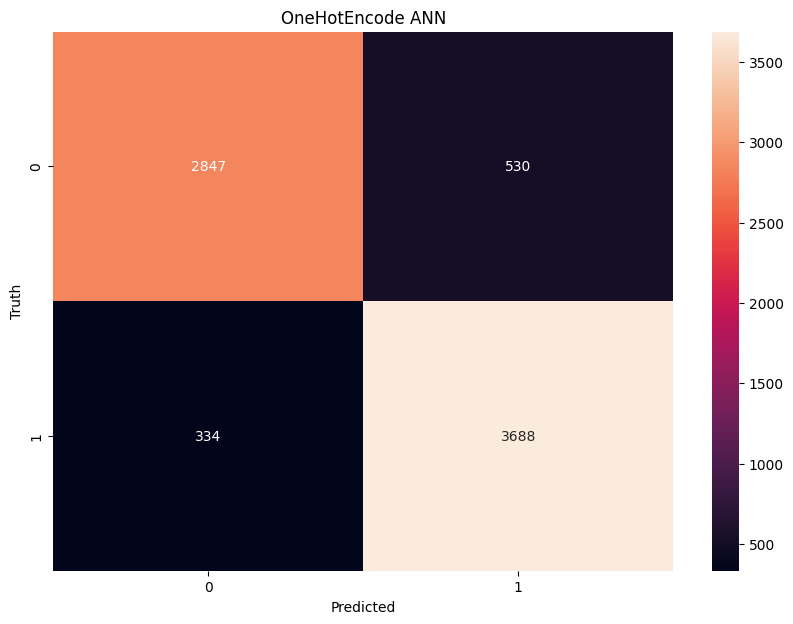

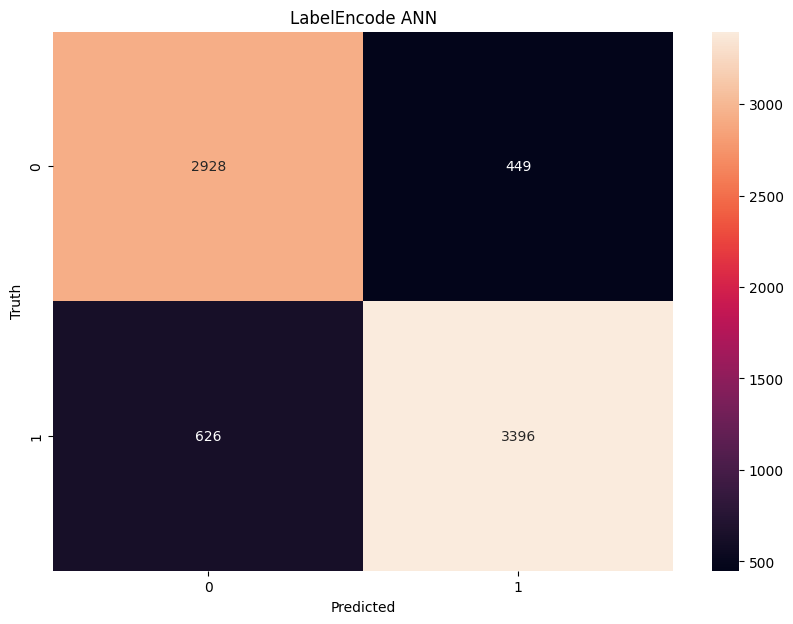

In [66]:
cm=tensorflow.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.title("OneHotEncode ANN")
plt.xlabel('Predicted')
plt.ylabel('Truth')

cm2=tensorflow.math.confusion_matrix(labels=y_test2,predictions=y_pred2)

plt.figure(figsize=(10,7))
sns.heatmap(cm2,annot=True,fmt='d')
plt.title("LabelEncode ANN")
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Working with other algorithms/models too

In [67]:
import xgboost
import catboost
import lightgbm as lgb

In [68]:
Model_Comparison=[]

### XGBoost

In [69]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train2,y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [70]:
from sklearn.model_selection import cross_val_score
scores_xgb=cross_val_score(xgb,x_train2,y_train2,cv=5)
scores_xgb.mean()

0.9320448449014952

In [71]:
y_pred_xgb=xgb.predict(x_test2)

In [72]:
accuracy_score(y_test,y_pred_xgb)

0.9306663062576024

In [73]:
Model_Comparison.append({
    'Model':'XGBClassifier',
    'Accuracy Score':accuracy_score(y_test,y_pred_xgb)
})

### CatBoost

In [74]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier(eval_metric='AUC',objective='Logloss',verbose=False)
cat.fit(x_train,y_train)

In [75]:
scores_cat=cross_val_score(cat,x_train,y_train,cv=5)
scores_cat.mean()

0.9344779109621207

In [76]:
y_pred_cat=cat.predict(x_test)
accuracy_score(y_test,y_pred_cat)

0.9336396810379781

In [77]:
Model_Comparison.append({
    'Model':'CatBoostClassifier',
    'Accuracy Score':accuracy_score(y_test,y_pred_cat)
})

### LightGBM

In [78]:
from lightgbm import LGBMClassifier

lgbm_clf=LGBMClassifier(
    objective='binary',
    learning_rate=0.05,
    num_leaves=31,
    n_estimators=100,
    verbose=-1
)

lgbm_clf.fit(
    x_train2,y_train2,
    eval_set=[(x_test2,y_test2)],
    eval_metric='accuracy',
)


LGBMClassifier(learning_rate=0.05, objective='binary', verbose=-1)

In [79]:
scores_lgbm=cross_val_score(lgbm_clf,x_train2,y_train2,cv=5)
scores_lgbm.mean()

0.934781959289201

In [80]:
y_pred_lgb=lgbm_clf.predict(x_test2)

In [81]:
accuracy_score(y_test,y_pred_lgb)

0.9362075956210298

In [82]:
Model_Comparison.append({
    'Model':'LGBMClassifier',
    'Accuracy Score':accuracy_score(y_test,y_pred_lgb)
})

In [83]:
pd.DataFrame(Model_Comparison)

,Model,Accuracy Score
0,XGBClassifier,0.930666
1,CatBoostClassifier,0.933640
2,LGBMClassifier,0.936208


# HyperParamater Tuning

In [84]:
HyperParameter_Tuned=[]

## XGBoost

In [85]:
from sklearn.model_selection import GridSearchCV
params_grid_xgb={
    'n_estimators':[100,200,500],
    'learning_rate':[0.01,0.05,0.1,0.3],
    'max_depth':[2,3,5,7],
    'subsample':[0.8,1],
    'colsample_bytree':[0.8,1]
}
grid_xgb=GridSearchCV(xgb,params_grid_xgb,scoring='accuracy',n_jobs=-1)
grid_xgb.fit(x_train2,y_train2)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.01, 0.05, 0.1, 0.3],
                         'max_depth': [2, 3, 5, 7],
                         'n_estimators': [100, 200, 500],
                         'subsample': [0.8, 1]},
             scoring='accuracy')

In [86]:
print("Best params:",grid_xgb.best_params_)
print("Best score:",grid_xgb.best_score_)

Best params: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1}
Best score: 0.9359985123031602


In [87]:
xgb_best=grid_xgb.best_estimator_
y_pred_grid_xgb=xgb_best.predict(x_test2)
accuracy_score(y_test2,y_pred_grid_xgb)

0.934720908230842

In [88]:
HyperParameter_Tuned.append({
    'Model':'XGBClassifier',
    'Accuracy Score':accuracy_score(y_test2,y_pred_grid_xgb),
    'Best Score':grid_xgb.best_score_
})

## CatBoost

In [89]:
param_grid_cat={
    'depth':[2,4,6,8],
    'iterations':[100,200,500],
    'learning_rate':[0.01,0.05,0.1,0.3]
}

grid_cat=GridSearchCV(cat,param_grid_cat,cv=3,scoring='accuracy',n_jobs=-1)
grid_cat.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x35bf69250>,
             n_jobs=-1,
             param_grid={'depth': [2, 4, 6, 8], 'iterations': [100, 200, 500],
                         'learning_rate': [0.01, 0.05, 0.1, 0.3]},
             scoring='accuracy')

In [90]:
print("Best params:",grid_cat.best_params_)
print("Best score:",grid_cat.best_score_)

Best params: {'depth': 6, 'iterations': 200, 'learning_rate': 0.1}
Best score: 0.9341736619546358


In [91]:
cat_best=grid_cat.best_estimator_
y_pred_grid_cat=cat_best.predict(x_test)
accuracy_score(y_test,y_pred_grid_cat)

0.9333693742397622

In [92]:
HyperParameter_Tuned.append({
    'Model':'CatBoostClassifier',
    'Accuracy Score':accuracy_score(y_test,y_pred_grid_cat),
    'Best Score':grid_cat.best_score_
    
})

## LightGBM

In [93]:
lgbm_params={
    "n_estimators":[100,200,500],
    "num_leaves":[31,50,100],
    "learning_rate":[0.01,0.05,0.1,0.3],
    "max_depth":[-1,5,10]
}

grid_lgbm=GridSearchCV(lgbm_clf,lgbm_params,verbose=False,cv=4,n_jobs=-1,scoring='accuracy')
grid_lgbm.fit(x_train,y_train)

GridSearchCV(cv=4,
             estimator=LGBMClassifier(learning_rate=0.05, objective='binary',
                                      verbose=-1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3],
                         'max_depth': [-1, 5, 10],
                         'n_estimators': [100, 200, 500],
                         'num_leaves': [31, 50, 100]},
             scoring='accuracy', verbose=False)

In [94]:
print("LGBM Best params:",grid_lgbm.best_params_)
print("LGBM Best Score:",grid_lgbm.best_score_)

LGBM Best params: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 100, 'num_leaves': 31}
LGBM Best Score: 0.9362688010380834


In [95]:
lgbm_best=grid_lgbm.best_estimator_
y_pred_grid_lgbm=lgbm_best.predict(x_test)
accuracy_score(y_test,y_pred_grid_lgbm)

0.9353966752263819

In [96]:
HyperParameter_Tuned.append({
    'Model':'LGBMClassifier',
    'Accuracy Score':accuracy_score(y_test,y_pred_grid_lgbm),
    'Best Score':grid_lgbm.best_score_
})

# Ensembling Learning by Voting Classifier

In [97]:
from sklearn.ensemble import VotingClassifier
estimators=[('xgb',xgb_best),('cat',cat_best),('lgbm',lgbm_best)]
vc=VotingClassifier(estimators=estimators,voting='soft')
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rat...
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x3588f1100>),
                             ('lgbm',
                              LGBMClassifier(learning_rate=0.05, max_depth=10,
                                             objective='binary', verbose=-1))],
                 voting='soft')

In [98]:
y_pred_vc=vc.predict(x_test)
accuracy_score(y_test,y_pred_vc)

0.934720908230842

In [99]:
HyperParameter_Tuned.append({
    'Model':'VotingClassifier',
    'Accuracy Score':accuracy_score(y_test,y_pred_vc),
})

In [100]:
pd.DataFrame(HyperParameter_Tuned)

,Model,Accuracy Score,Best Score
0,XGBClassifier,0.934721,0.935999
1,CatBoostClassifier,0.933369,0.934174
2,LGBMClassifier,0.935397,0.936269
3,VotingClassifier,0.934721,NaN


## So, LightGBM after all it's HyperParameter Tuning comes out to be best so far

In [101]:
churn_model_final=lgbm_best
churn_model_final.fit(x_train,y_train)
y_pred_final=churn_model_final.predict(x_test)
accuracy_score(y_test,y_pred_final)

0.9353966752263819

In [102]:
df_clv=df1_ohe.copy()
df_clv['Churn_probability']=churn_model_final.predict_proba(x)[:,1]

### Make a dataframe including the churn probabilities to use for calculating customer lifetime value (CLV)

In [103]:
df_clv.to_csv('df_clv.csv',index=False)